In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy as sc
from ydata_profiling import ProfileReport
from scipy import stats as sts
import sklearn 
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LinearRegression, ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error, f1_score, mean_absolute_error, r2_score, mean_absolute_percentage_error, mean_squared_log_error, explained_variance_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer, KNNImputer
sklearn.impute.KNNImputer
from sklearn.base import BaseEstimator, TransformerMixin
import phik
from typing import Literal
from lightgbm import LGBMRegressor
import umap
import optuna
from sklearn.pipeline import Pipeline
import mlflow
import mlflow.sklearn  # Если нужно логировать модели sklearn
import os
from mlflow.models import infer_signature
pd.set_option('display.max_columns', None)
from catboost import CatBoostRegressor
from category_encoders import CatBoostEncoder
    
%matplotlib

Using matplotlib backend: module://matplotlib_inline.backend_inline


In [2]:
mlflow.set_tracking_uri('http://127.0.0.1:5000')

In [3]:
mlflow.set_experiment("price_prediction_experiment")

MlflowException: API request to endpoint /api/2.0/mlflow/experiments/get-by-name failed with error code 403 != 200. Response body: ''

In [4]:
df = pd.read_csv('data/portugal_listinigs.csv')

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/499035845.py:1: DtypeWarning: Columns (6,8,12,13,14,15,16,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/portugal_listinigs.csv')


In [5]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [6]:
df = df.dropna(subset=['Price'])

<Axes: ylabel='Price'>

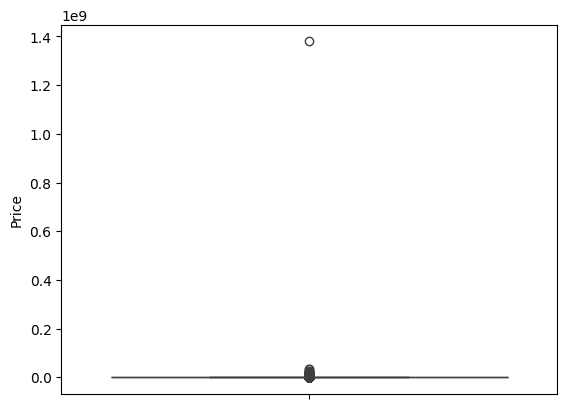

In [7]:
sns.boxplot(df['Price'])

In [8]:
df.drop(index=df[df['Price'] == max(df['Price'])].index, inplace=True)

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/126092300.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(index=df[df['Price'] == max(df['Price'])].index, inplace=True)


<Axes: ylabel='Price'>

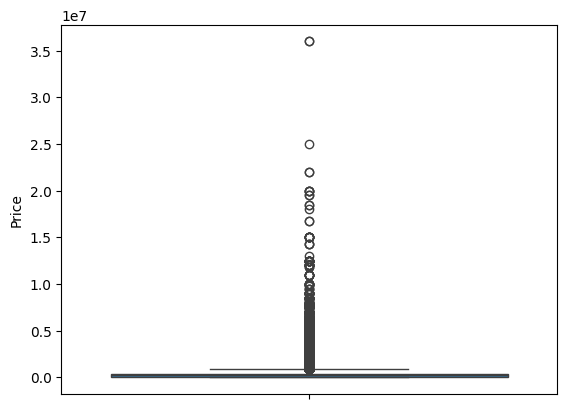

In [9]:
sns.boxplot(df['Price'])

In [10]:
df[df['Price'] > 10000000].sort_values(by='Price', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
82054,36000000.0,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,1.0,NaN,2001.0,6382.0,NaN,NC,2024-09-02 16:00:34.667,False,True,True,NaN,NaN,NaN,NaN,6382.0,47054.0,NaN,NaN
64294,36000000.0,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,3.0,True,2001.0,47054.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,6382.0,NaN,NaN,NaN
120664,25000000.0,Lisboa,Lisboa,Avenidas Novas,Building,NC,NaN,1.0,NaN,2024.0,2877.0,NaN,NC,2024-11-15 10:26:01.167,False,False,True,NaN,NaN,NaN,NaN,2877.0,NaN,2877.00,NaN
82055,22000000.0,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,1.0,NaN,2005.0,1828.0,NaN,NC,2024-09-02 16:02:48.580,False,True,True,NaN,NaN,NaN,NaN,1828.0,21300.0,NaN,NaN
64229,22000000.0,Faro,Albufeira,Albufeira e Olhos de Água,Hotel,NC,NaN,3.0,True,2005.0,21300.0,NaN,NaN,NaN,NaN,True,NaN,NaN,NaN,NaN,NaN,1828.0,NaN,NaN,NaN
1749,20000000.0,Faro,Lagos,Bensafrim e Barão de São João,Land,NC,NaN,0.0,False,NaN,490807.0,NaN,NaN,NaN,NaN,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
109573,20000000.0,Setúbal,Palmela,Poceirão e Marateca,Land,NC,NaN,0.0,NaN,NaN,NaN,NaN,NC,2024-07-31 08:31:04.557,False,False,False,NaN,NaN,0.0,NaN,NaN,165620600.0,NaN,0.0
84705,20000000.0,Faro,Lagos,Bensafrim e Barão de São João,Land,NC,NaN,0.0,NaN,NaN,490807.0,NaN,NC,NaN,False,False,False,0.0,0.0,0.0,NaN,NaN,490807.0,NaN,0.0
58159,20000000.0,Setúbal,Palmela,Poceirão e Marateca,Land,NC,NaN,0.0,False,NaN,165620600.0,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2560,19500000.0,Faro,Lagos,Bensafrim e Barão de São João,Investment,NC,NaN,0.0,False,NaN,2716250.0,2716250.0,NaN,NaN,NaN,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


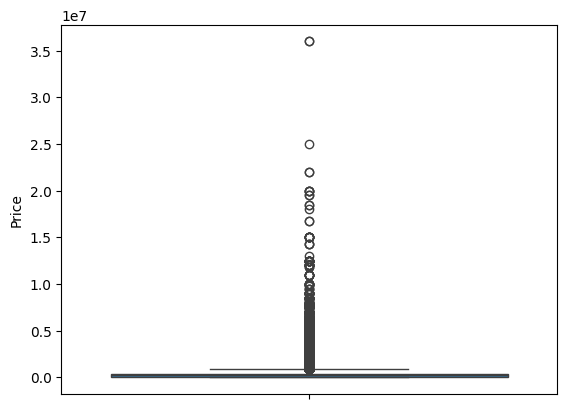

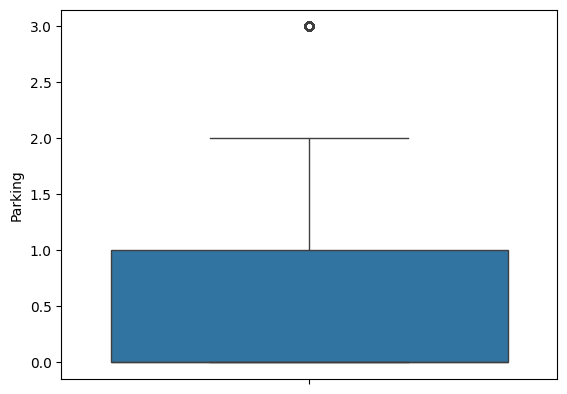

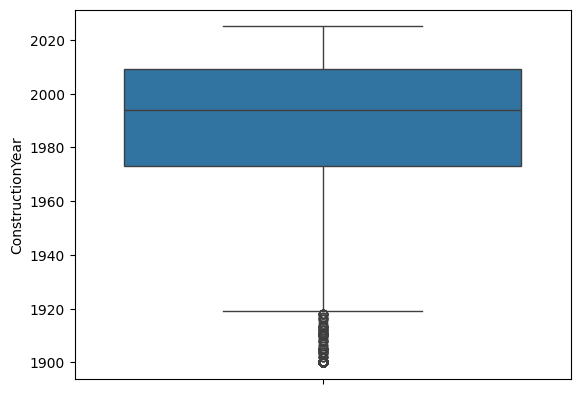

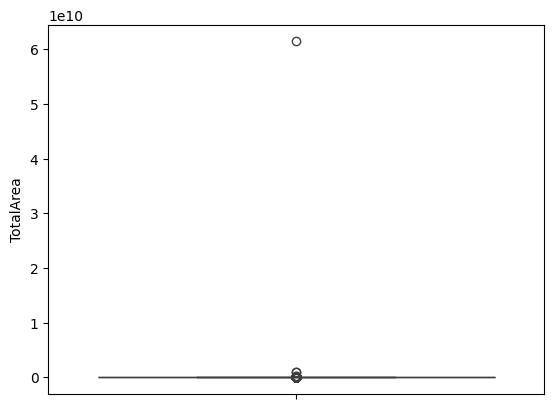

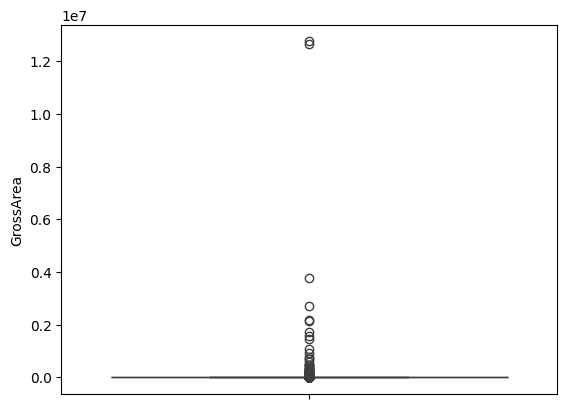

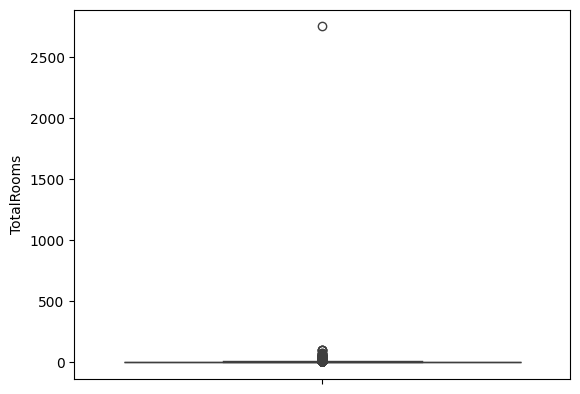

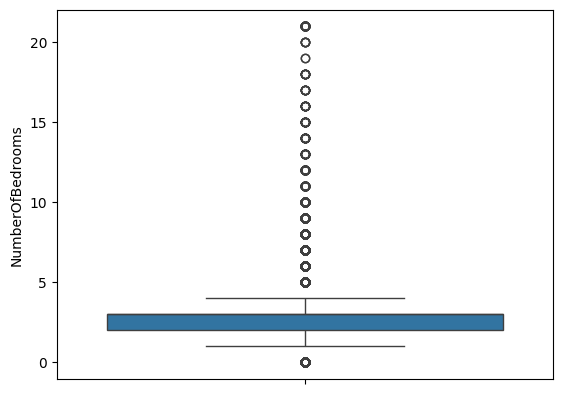

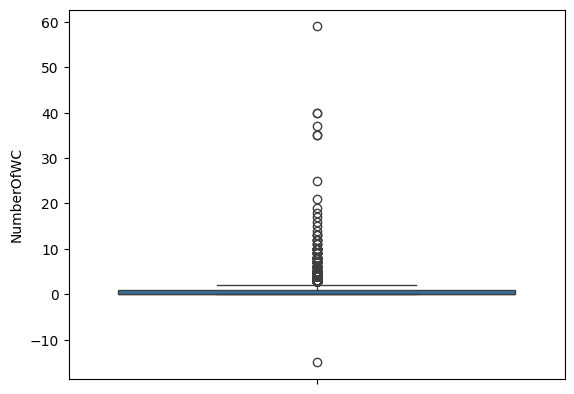

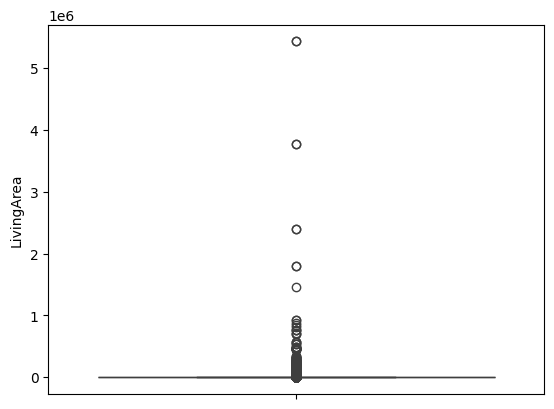

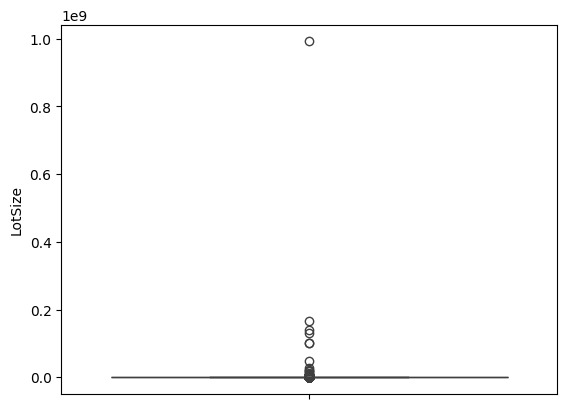

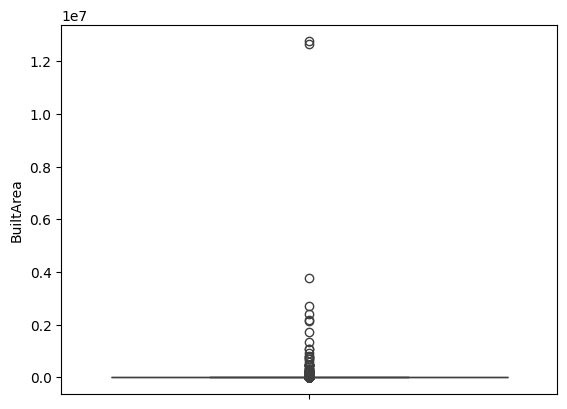

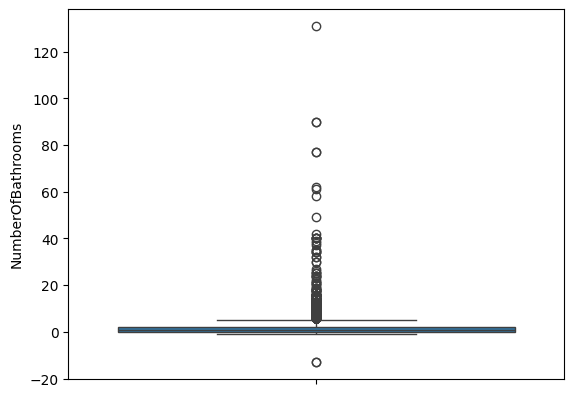

In [11]:
num_cols = df.select_dtypes(include=[np.number]).columns

for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

TotalArea, GrossArea, TotalRooms, LotSize, BuiltArea

In [12]:
df = df.drop(index=df[df['TotalArea'] > 5000000000].index)
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: ylabel='TotalArea'>

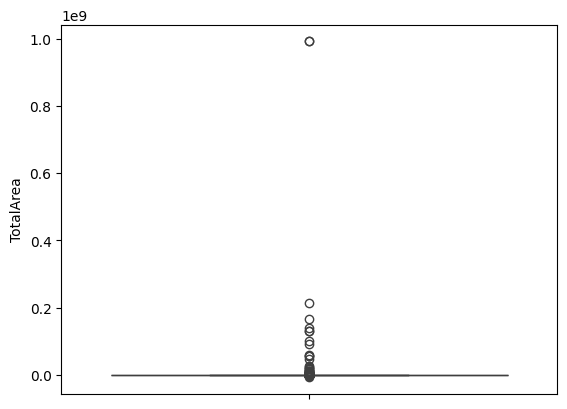

In [13]:
sns.boxplot(df['TotalArea'])

In [14]:
df = df.drop(index=df[df['TotalArea'] == df['TotalArea'].max()].index)

<Axes: ylabel='TotalArea'>

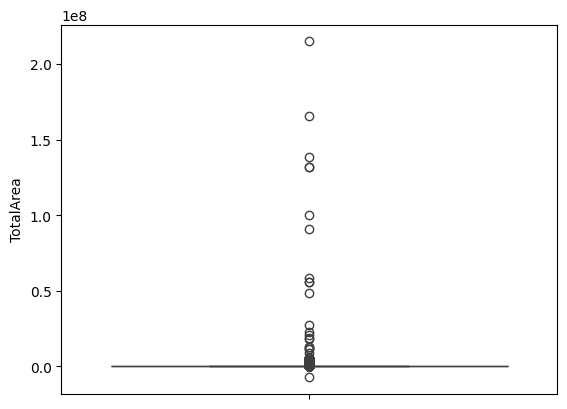

In [15]:
sns.boxplot(df['TotalArea'])

<Axes: ylabel='GrossArea'>

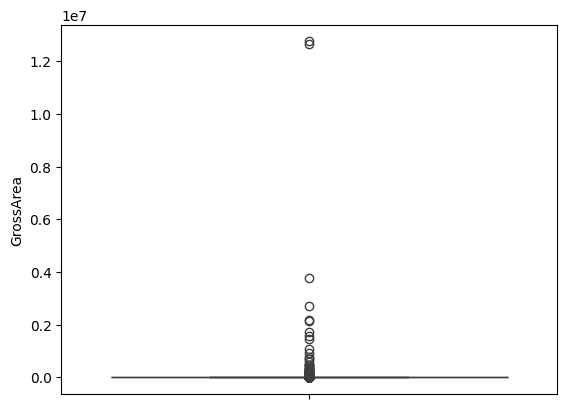

In [16]:
sns.boxplot(df['GrossArea'])

In [17]:
df = df.drop(index=df[df['GrossArea'] > 10000000].index)

<Axes: ylabel='GrossArea'>

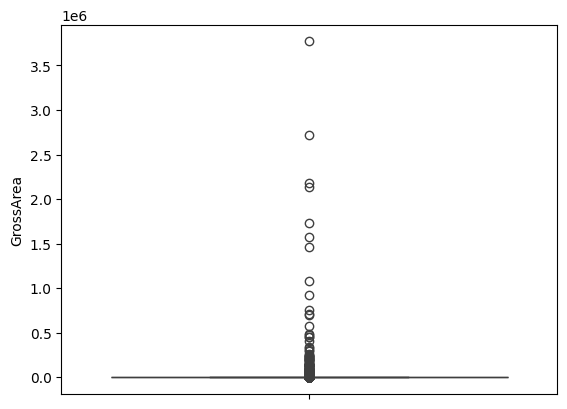

In [18]:
sns.boxplot(df['GrossArea'])

In [19]:
df.sort_values(by='GrossArea', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
44294,3975000.0,Portalegre,Avis,Aldeia Velha,Estate,NC,NaN,0.0,False,1961.0,3770000.0,3770000.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,3770000.0,NaN,NaN,0.0
2560,19500000.0,Faro,Lagos,Bensafrim e Barão de São João,Investment,NC,NaN,0.0,False,NaN,2716250.0,2716250.0,NaN,NaN,NaN,False,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
55671,9950000.0,Faro,Silves,Silves,Farm,D,NaN,0.0,False,NaN,1036.0,2181280.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44361,5700000.0,Portalegre,Campo Maior,São João Batista,Estate,NC,NaN,0.0,False,NaN,2135000.0,2135000.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2504,6000000.0,Faro,Silves,Silves,Farm,NC,NaN,3.0,True,NaN,1733080.0,1733080.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,1280.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: ylabel='TotalRooms'>

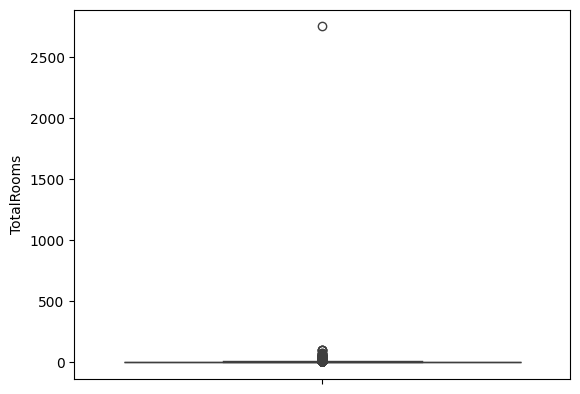

In [20]:
sns.boxplot(df['TotalRooms'])

In [21]:
df = df.drop(index=df[df['TotalRooms'] > 1000].index)

<Axes: ylabel='TotalRooms'>

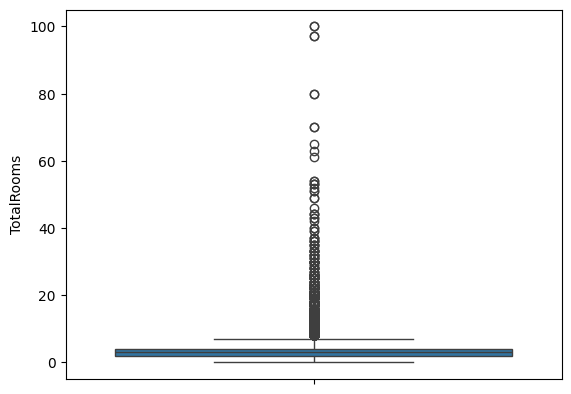

In [22]:
sns.boxplot(df['TotalRooms'])

In [23]:
df.sort_values(by='NumberOfBedrooms', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
105319,3000000.0,Porto,Póvoa de Varzim,Estela,Hotel,C,NaN,1.0,NaN,1995.0,2832.0,NaN,C,NaN,False,True,False,NaN,21.0,8.0,NaN,2832.0,4300.0,2832.40,58.0
89681,8000000.0,Lisboa,Lisboa,Santa Maria Maior,Building,NC,NaN,1.0,NaN,1972.0,840.0,NaN,NC,NaN,False,True,False,NaN,21.0,0.0,NaN,714.0,184.0,NaN,23.0
127240,3000000.0,Lisboa,Lisboa,Santa Maria Maior,Building,D,NaN,0.0,NaN,NaN,824.0,NaN,D,2024-12-19 17:27:17.213,False,False,False,24.0,21.0,0.0,NaN,741.0,461.0,824.11,2.0
127177,2400000.0,Setúbal,Almada,Charneca de Caparica e Sobreda,Other - Commercial,C,NaN,1.0,NaN,2014.0,1182.0,NaN,C,2024-12-18 16:56:50.507,False,True,False,21.0,21.0,0.0,NaN,849.0,2075.0,NaN,26.0
70571,2250000.0,Aveiro,Ovar,"Ovar, São João, Arada e São Vicente de Pereira...",Hotel,NC,NaN,0.0,NaN,1990.0,3750.0,NaN,NC,NaN,True,True,False,NaN,21.0,1.0,NaN,3750.0,2192.0,1667.00,61.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135521,537500.0,Setúbal,Alcácer do Sal,Alcácer do Sal (Santa Maria do Castelo e Santi...,Building,D,NaN,0.0,NaN,1988.0,156.0,NaN,D,NaN,False,False,False,NaN,NaN,0.0,NaN,156.0,58.0,NaN,0.0
135527,990000.0,Setúbal,Almada,"Almada, Cova da Piedade, Pragal e Cacilhas",Building,NC,NaN,0.0,NaN,1961.0,564.0,NaN,NC,2024-06-26 09:32:13,False,False,False,NaN,NaN,0.0,NaN,563.0,NaN,NaN,0.0
135528,130000.0,Setúbal,Palmela,Palmela,Land,NC,NaN,0.0,NaN,NaN,1189.0,NaN,NC,2021-08-19 15:22:16,False,False,False,NaN,NaN,0.0,NaN,NaN,1189.0,NaN,0.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [24]:
df[df['NumberOfWC'] < 0]

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
94946,1250000.0,Lisboa,Lisboa,Avenidas Novas,Apartment,NC,NaN,0.0,NaN,NaN,133.0,NaN,NC,NaN,True,True,False,3.0,2.0,-15.0,New,127.0,NaN,NaN,-13.0


In [25]:
df = df.drop(index=df[df['NumberOfWC'] < 0].index)

<Axes: ylabel='NumberOfWC'>

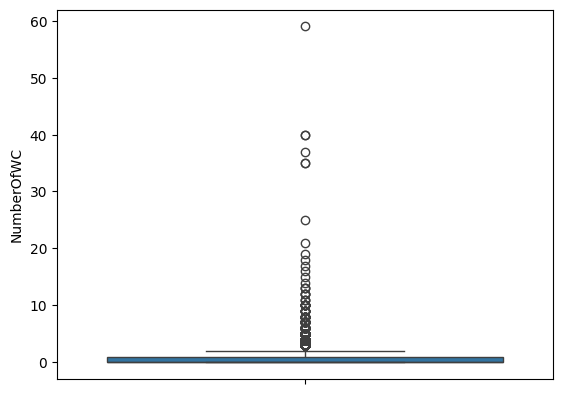

In [26]:
sns.boxplot(df['NumberOfWC'])

In [27]:
df.sort_values(by='NumberOfWC', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
94949,1700000.0,Lisboa,Lisboa,Avenidas Novas,Apartment,NC,NaN,0.0,NaN,NaN,176.0,NaN,NC,NaN,True,True,False,5.0,4.0,59.0,New,168.0,NaN,NaN,62.0
95393,4000000.0,Lisboa,Lisboa,Olivais,Building,NC,NaN,0.0,NaN,1949.0,3278.0,NaN,NC,NaN,False,False,False,NaN,21.0,40.0,Needs renovation,3278.0,NaN,3278.0,40.0
87142,850000.0,Leiria,Caldas da Rainha,"Caldas da Rainha - Nossa Senhora do Pópulo, Co...",Other - Residential,NC,NaN,0.0,NaN,NaN,812.0,NaN,NC,NaN,False,True,False,49.0,21.0,40.0,NaN,NaN,NaN,NaN,40.0
113134,1980000.0,Viana do Castelo,Valença,Gandra e Taião,Hotel,C,NaN,1.0,NaN,2007.0,3051.0,NaN,C,NaN,False,True,False,37.0,21.0,37.0,NaN,NaN,9500.0,3436.0,37.0
80569,1200000.0,Coimbra,Figueira da Foz,Buarcos e São Julião,Hotel,NC,NaN,0.0,NaN,1946.0,1510.0,NaN,NC,NaN,True,False,False,35.0,21.0,35.0,Used,NaN,1267.0,NaN,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135515,60000.0,Setúbal,Montijo,Pegões,Land,NC,NaN,0.0,NaN,NaN,NaN,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,252.0,NaN,NaN
135520,950000.0,Setúbal,Moita,Alhos Vedros,Industrial,NC,NaN,0.0,NaN,NaN,5280.0,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135524,280000.0,Setúbal,Montijo,Montijo e Afonsoeiro,House,E,NaN,0.0,NaN,1971.0,27.0,NaN,E,NaN,True,False,False,NaN,2.0,NaN,NaN,27.0,400.0,NaN,2.0
135525,395000.0,Setúbal,Alcochete,Alcochete,Apartment,D,NaN,0.0,NaN,2003.0,232.0,NaN,D,NaN,False,True,False,NaN,4.0,NaN,Good condition,119.0,232.0,NaN,2.0


In [28]:
df = df.drop(index=94949)

<Axes: ylabel='NumberOfWC'>

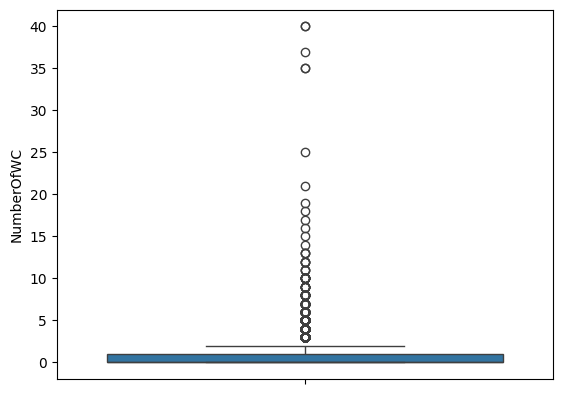

In [29]:
sns.boxplot(df['NumberOfWC'])

<Axes: ylabel='LotSize'>

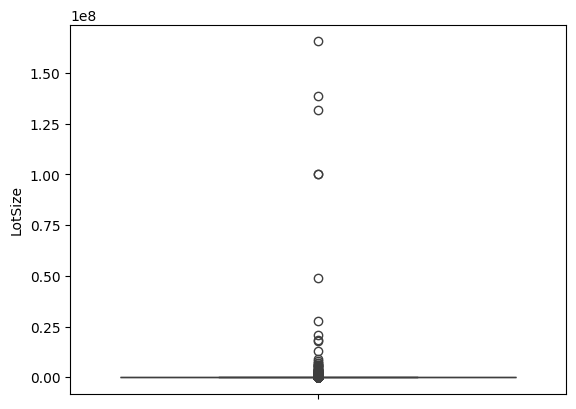

In [30]:
sns.boxplot(df['LotSize'])

In [31]:
df.sort_values(by='LotSize', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
109573,20000000.0,Setúbal,Palmela,Poceirão e Marateca,Land,NC,NaN,0.0,NaN,NaN,NaN,NaN,NC,2024-07-31 08:31:04.557,False,False,False,NaN,NaN,0.0,NaN,NaN,165620600.0,NaN,0.0
80278,315000.0,Coimbra,Coimbra,São Silvestre,Farm,NC,NaN,0.0,NaN,NaN,300.0,NaN,NC,NaN,False,False,False,NaN,NaN,0.0,Needs renovation,300.0,138836800.0,NaN,0.0
71118,1280000.0,Beja,Odemira,Relíquias,Land,F,NaN,0.0,NaN,NaN,131699000.0,NaN,F,NaN,False,False,False,4.0,NaN,0.0,NaN,263.0,131699000.0,NaN,0.0
74533,850000.0,Bragança,Mirandela,Múrias,Farm,D,NaN,0.0,NaN,NaN,742.0,NaN,D,NaN,True,False,False,NaN,6.0,0.0,NaN,NaN,100000000.0,NaN,6.0
75908,850000.0,Bragança,Mirandela,Múrias,Farm,D,NaN,0.0,NaN,NaN,742.0,NaN,D,NaN,True,False,False,NaN,6.0,0.0,NaN,NaN,100000000.0,NaN,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135520,950000.0,Setúbal,Moita,Alhos Vedros,Industrial,NC,NaN,0.0,NaN,NaN,5280.0,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
135527,990000.0,Setúbal,Almada,"Almada, Cova da Piedade, Pragal e Cacilhas",Building,NC,NaN,0.0,NaN,1961.0,564.0,NaN,NC,2024-06-26 09:32:13,False,False,False,NaN,NaN,0.0,NaN,563.0,NaN,NaN,0.0
135530,155000.0,Viana do Castelo,Arcos de Valdevez,Paçô,Apartment,E,NaN,1.0,NaN,2000.0,87.0,NaN,E,2025-01-14 15:14:02,False,False,False,NaN,2.0,0.0,NaN,87.0,NaN,NaN,1.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.0,1.0


In [32]:
df = df.drop(index=109573)

In [33]:
df = df.drop_duplicates()

In [34]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: ylabel='BuiltArea'>

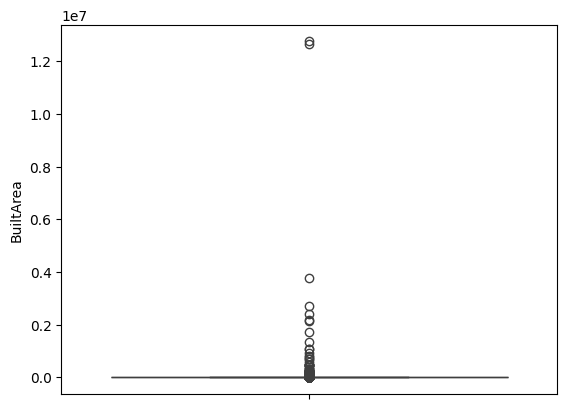

In [35]:
sns.boxplot(df['BuiltArea'])

In [36]:
df.sort_values(by='BuiltArea', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
73423,775000.0,Braga,Braga,Tebosa,Industrial,NC,NaN,0.0,NaN,NaN,12750000.0,NaN,NC,2024-02-12 19:29:21.207,False,False,False,NaN,NaN,NaN,NaN,NaN,12750000.0,12750000.0,NaN
69628,2200000.0,Aveiro,Águeda,Aguada de Cima,Warehouse,NC,NaN,0.0,NaN,2010.0,3442000.0,NaN,NC,2024-01-30 18:20:50.550,False,False,False,NaN,NaN,0.0,Used,5429000.0,5732000.0,12650000.0,0.0
98256,3975000.0,Portalegre,Avis,Aldeia Velha,Estate,NC,NaN,0.0,NaN,1961.0,3770000.0,NaN,NC,NaN,False,False,False,NaN,NaN,0.0,NaN,3770000.0,3770000.0,3770000.0,0.0
84864,19500000.0,Faro,Lagos,Bensafrim e Barão de São João,Investment,NC,NaN,0.0,NaN,NaN,2716250.0,NaN,NC,NaN,False,False,False,0.0,0.0,0.0,NaN,NaN,2716250.0,2716250.0,0.0
134345,1099500.0,Évora,Vendas Novas,Vendas Novas,Land,NC,NaN,0.0,NaN,NaN,2417260.0,NaN,NC,2025-01-24 12:22:05.127,False,False,False,NaN,NaN,NaN,NaN,NaN,2500000.0,2417260.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135527,990000.0,Setúbal,Almada,"Almada, Cova da Piedade, Pragal e Cacilhas",Building,NC,NaN,0.0,NaN,1961.0,564.0,NaN,NC,2024-06-26 09:32:13,False,False,False,NaN,NaN,0.0,NaN,563.0,NaN,NaN,0.0
135528,130000.0,Setúbal,Palmela,Palmela,Land,NC,NaN,0.0,NaN,NaN,1189.0,NaN,NC,2021-08-19 15:22:16,False,False,False,NaN,NaN,0.0,NaN,NaN,1189.0,NaN,0.0
135529,45000.0,Viana do Castelo,Ponte de Lima,Labruja,House,NC,NaN,1.0,NaN,1937.0,374.0,NaN,NC,NaN,False,False,False,NaN,0.0,0.0,NaN,374.0,4370.0,NaN,0.0
135530,155000.0,Viana do Castelo,Arcos de Valdevez,Paçô,Apartment,E,NaN,1.0,NaN,2000.0,87.0,NaN,E,2025-01-14 15:14:02,False,False,False,NaN,2.0,0.0,NaN,87.0,NaN,NaN,1.0


In [37]:
df = df.drop(index=[73423, 69628])

<Axes: ylabel='BuiltArea'>

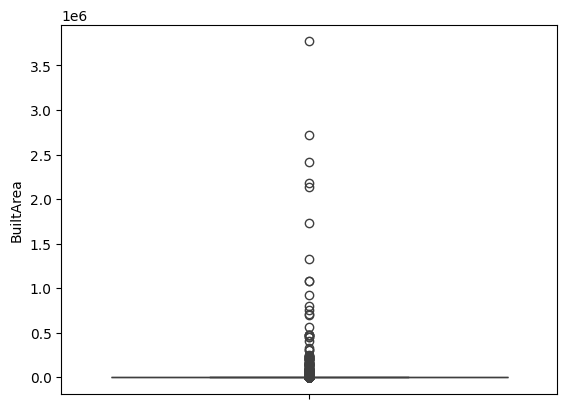

In [38]:
sns.boxplot(df['BuiltArea'])

In [39]:
df.sort_values(by='NumberOfBathrooms', ascending=False)

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
135120,55000.0,Portalegre,Alter do Chão,Cunheira,House,NC,NaN,0.0,NaN,1970.0,41.0,NaN,NC,2025-01-23 17:19:52.243,False,False,False,2.0,1.0,1.0,NaN,100.0,101.0,130.0,131.0
86150,6800000.0,Leiria,Caldas da Rainha,"Caldas da Rainha - Nossa Senhora do Pópulo, Co...",Hotel,C,NaN,1.0,NaN,1992.0,4845.0,NaN,C,NaN,False,True,False,97.0,21.0,0.0,Good condition,4845.0,9065.0,5345.0,90.0
102894,1900000.0,Porto,Paços de Ferreira,Seroa,Other - Commercial,D,NaN,0.0,NaN,2010.0,2200.0,NaN,D,NaN,True,True,True,80.0,NaN,4.0,Like new,2200.0,2530.0,2530.0,77.0
70571,2250000.0,Aveiro,Ovar,"Ovar, São João, Arada e São Vicente de Pereira...",Hotel,NC,NaN,0.0,NaN,1990.0,3750.0,NaN,NC,NaN,True,True,False,NaN,21.0,1.0,NaN,3750.0,2192.0,1667.0,61.0
105319,3000000.0,Porto,Póvoa de Varzim,Estela,Hotel,C,NaN,1.0,NaN,1995.0,2832.0,NaN,C,NaN,False,True,False,NaN,21.0,8.0,NaN,2832.0,4300.0,2832.4,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135506,800000.0,Setúbal,Setúbal,São Sebastião,Warehouse,NC,NaN,0.0,NaN,1990.0,1120.0,NaN,NC,NaN,False,False,False,NaN,0.0,NaN,Good condition,NaN,6196.0,NaN,NaN
135508,12500.0,Setúbal,Setúbal,São Sebastião,Garage,NC,NaN,0.0,NaN,2007.0,15.0,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,13.0,NaN,NaN,NaN
135512,100000.0,Setúbal,Palmela,Pinhal Novo,Land,NC,NaN,0.0,NaN,NaN,568.0,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,568.0,NaN,NaN
135515,60000.0,Setúbal,Montijo,Pegões,Land,NC,NaN,0.0,NaN,NaN,NaN,NaN,NC,NaN,False,False,False,NaN,NaN,NaN,NaN,NaN,252.0,NaN,NaN


In [40]:
df = df.drop(index=135120)

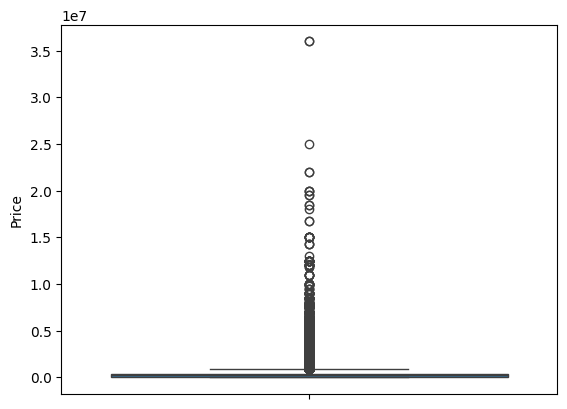

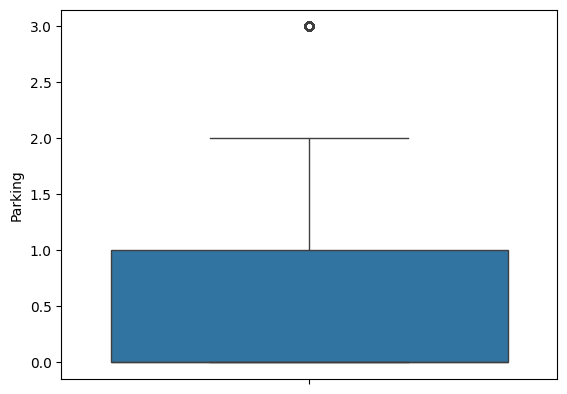

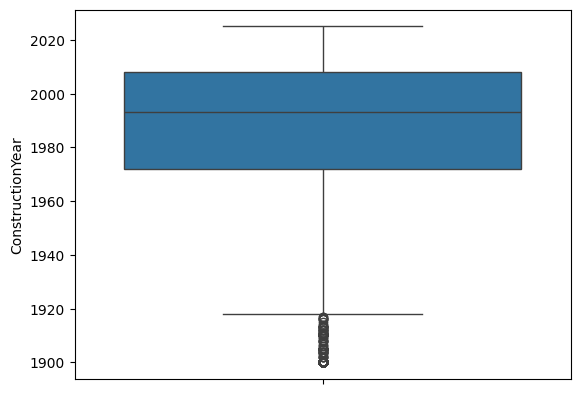

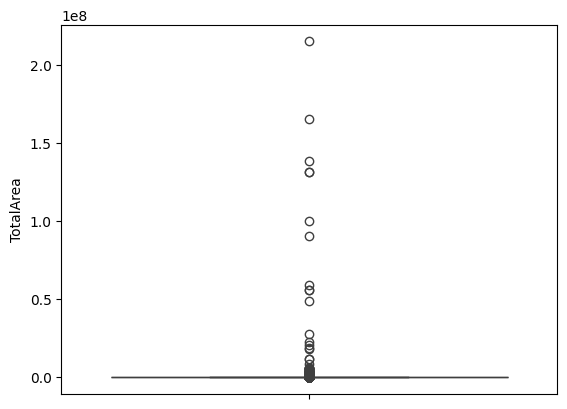

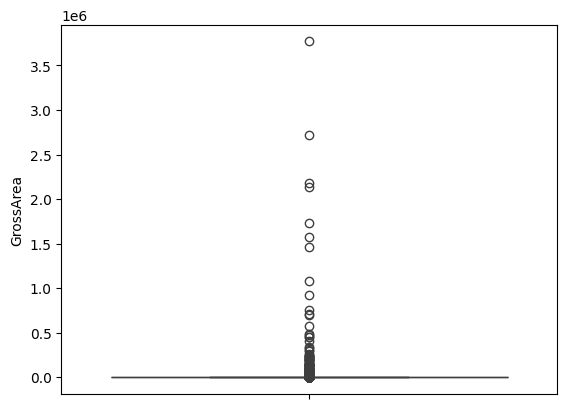

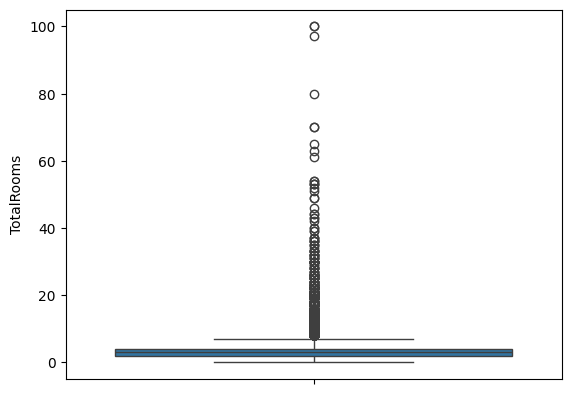

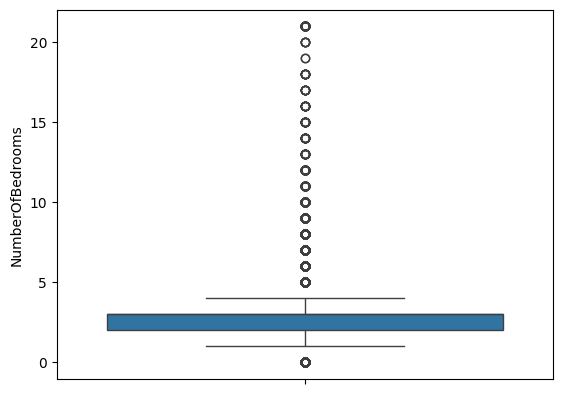

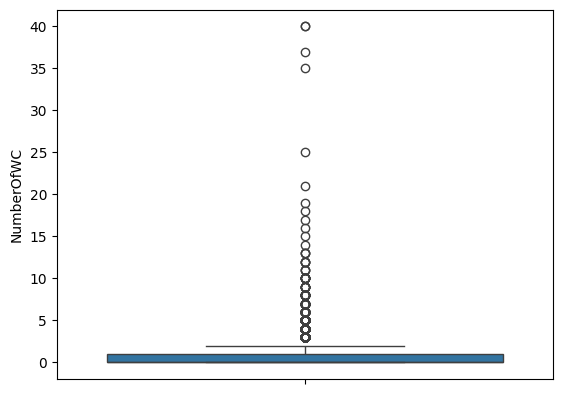

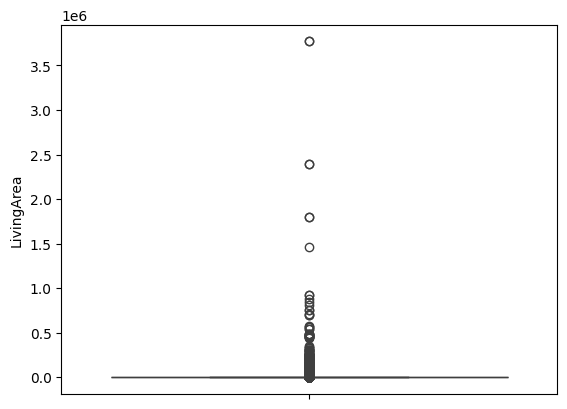

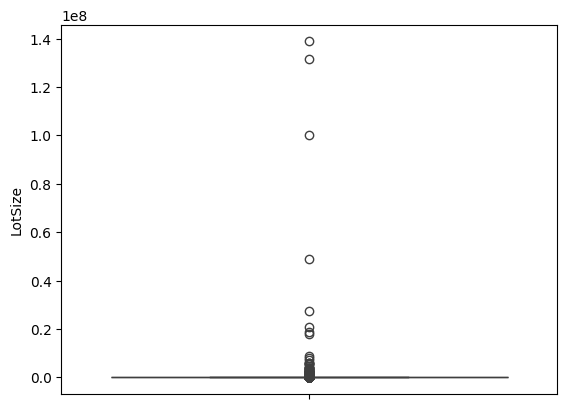

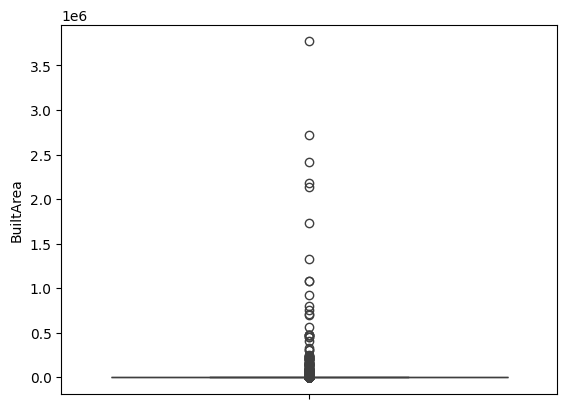

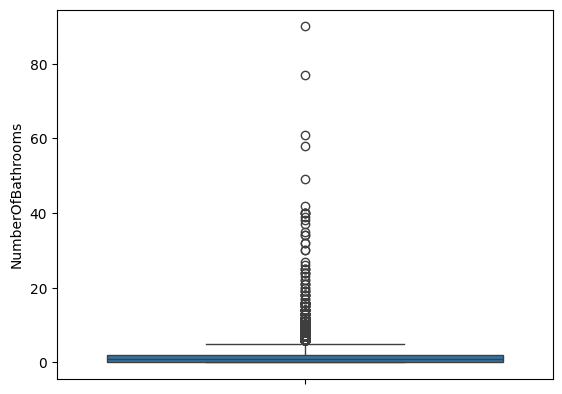

In [41]:
num_cols = df.select_dtypes(include=[np.number]).columns

for i in num_cols:
    df.drop(index=df[df[i] < 0].index, inplace=True)
    sns.boxplot(df[i])
    plt.show()

In [42]:
df['Type'].value_counts()

Type
Apartment              43849
House                  34461
Land                   29510
Store                   5058
Farm                    3756
Building                2392
Transfer of lease       1580
Warehouse               1337
Garage                   885
Other - Commercial       763
Office                   696
Other - Residential      556
Industrial               397
Duplex                   363
Investment               220
Storage                  166
Hotel                    148
Studio                    66
Estate                    60
Mansion                   31
Manor                      6
Name: count, dtype: int64

In [43]:
df.isna().sum()

Price                         0
District                      0
City                          0
Town                          2
Type                         15
EnergyCertificate            13
Floor                    100304
Parking                     146
HasParking                62580
ConstructionYear          43165
TotalArea                  7801
GrossArea                100330
EnergyEfficiencyLevel     63765
PublishDate               98420
Garage                    63765
Elevator                     30
ElectricCarsCharging      63765
TotalRooms                57703
NumberOfBedrooms          82624
NumberOfWC                73197
ConservationStatus       108317
LivingArea                28473
LotSize                   89496
BuiltArea                101526
NumberOfBathrooms          6494
dtype: int64

In [44]:
df = df.dropna(subset='Price')

In [45]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


<Axes: >

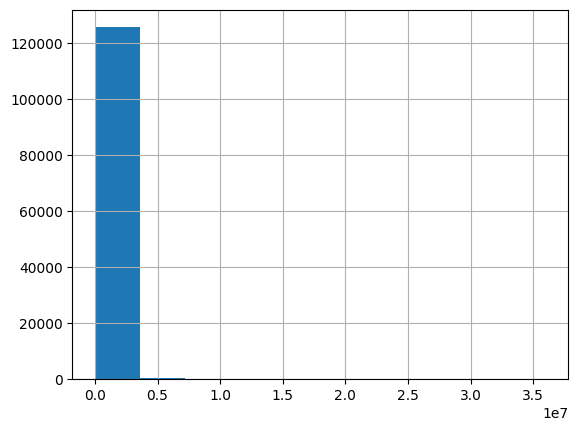

In [46]:
df['Price'].hist()

In [47]:
# profile = ProfileReport(df, minimal=True)
# profile.to_file('real_estate_report.html')

In [48]:
print(df.info(memory_usage="deep"))
print(df.memory_usage(deep=True).sum() / 1024**2, "MB")


<class 'pandas.core.frame.DataFrame'>
Index: 126315 entries, 0 to 135535
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Price                  126315 non-null  float64
 1   District               126315 non-null  object 
 2   City                   126315 non-null  object 
 3   Town                   126313 non-null  object 
 4   Type                   126300 non-null  object 
 5   EnergyCertificate      126302 non-null  object 
 6   Floor                  26011 non-null   object 
 7   Parking                126169 non-null  float64
 8   HasParking             63735 non-null   object 
 9   ConstructionYear       83150 non-null   float64
 10  TotalArea              118514 non-null  float64
 11  GrossArea              25985 non-null   float64
 12  EnergyEfficiencyLevel  62550 non-null   object 
 13  PublishDate            27895 non-null   object 
 14  Garage                 62550 non-null   o

In [49]:
df_num = df.select_dtypes(include='number')

In [50]:
df = df[df['Price'] != df['Price'].max()]
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [51]:
from geopy.geocoders import Nominatim
from tqdm import tqdm

In [52]:
geolocator = Nominatim(user_agent="city_to_coords")

def get_coordinates(city_list):
    results = []
    for city in tqdm(city_list, desc="Обработка городов"):
        try:
            location = geolocator.geocode(city)
            if location:
                results.append((city, location.latitude, location.longitude))
            else:
                results.append((city, None, None))
        except Exception as e:
            print(f"Ошибка при обработке {city}: {e}")
            results.append((city, None, None))
    return results


coords = get_coordinates(df['City'].unique())
coords


Обработка городов: 100%|██████████| 275/275 [07:12<00:00,  1.57s/it]


[('São Brás de Alportel', 37.1529622, -7.8879138),
 ('Albufeira', 37.088241, -8.2526339),
 ('Vila do Bispo', 37.0829799, -8.9096115),
 ('Portimão', 37.1375808, -8.5368426),
 ('Faro', 37.0162727, -7.9351771),
 ('Loulé', 37.1395485, -8.0232598),
 ('Lagos', 6.4550575, 3.3941795),
 ('Peniche', 39.3568749, -9.3786838),
 ('Alcoutim', 37.402329300000005, -7.669049938495098),
 ('Valpaços', 41.6067883, -7.3108525),
 ('Lagoa (Algarve)', 37.16173885, -8.50351695),
 ('Castro Marim', 37.2179367, -7.4457102),
 ('Olhão', 37.0270369, -7.8411287),
 ('Vila Real de Santo António', 37.1946052, -7.4155628),
 ('Silves', 37.26398255, -8.348731138182709),
 ('Tavira', 37.1262493, -7.6499121),
 ('Aljezur', 37.3151549, -8.8040533),
 ('Porto', 41.1494512, -8.6107884),
 ('Monchique', 37.3179725, -8.5558655),
 ('Sintra', 38.79846, -9.3881),
 ('Seia', 40.4200998, -7.7028054),
 ('Paços de Ferreira', 41.290118, -8.378194008811969),
 ('Almeida', 40.7260772, -6.9065743),
 ('Gouveia', -18.4545728, -43.7415904),
 ('Celori

In [53]:
l = []
la = []
c = []
for i in coords: 
    la.append(i[1])
    l.append(i[2])


In [54]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,PublishDate,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,NaN,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,NaN,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,NaN,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,2022-07-07 16:06:50,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0


In [55]:
df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/2819840563.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['lactitude'] = df['City'].map(dict(zip(df['City'].unique(), la)))
/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/2819840563.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['longitude'] = df['City'].map(dict(zip(df['City'].unique(), l)))


In [56]:
df['PublishDate']

0                         NaN
1                         NaN
2                         NaN
3                         NaN
4                         NaN
                 ...         
135531                    NaN
135532                    NaN
135533                    NaN
135534    2022-07-07 16:06:50
135535    2023-01-05 15:37:09
Name: PublishDate, Length: 126313, dtype: object

In [57]:
import re

pattern = r"\d{4}-\d{2}-\d{2}"

for i in df.dropna().index:
    re.findall(pattern, df['PublishDate'][i])

In [58]:
df['ExtractedDate'] = df['PublishDate'].dropna().apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/1427836694.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = df['PublishDate'].dropna().apply(lambda x: re.findall(pattern, x)[0] if re.findall(pattern, x) else None)


In [59]:
df['ExtractedDate']

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
135531           NaN
135532           NaN
135533           NaN
135534    2022-07-07
135535    2023-01-05
Name: ExtractedDate, Length: 126313, dtype: object

In [60]:
df['ExtractedDate'].unique()

array([nan, '2024-10-21', '2024-10-18', '2024-10-17', '2024-10-16',
       '2024-10-15', '2024-10-14', '2024-10-11', '2024-10-10',
       '2024-10-12', '2024-10-09', '2024-10-08', '2024-10-07',
       '2024-10-04', '2024-10-03', '2024-10-02', '2024-10-01',
       '2024-10-06', '2024-09-30', '2024-09-26', '2024-09-20',
       '2024-09-19', '2024-09-18', '2024-09-27', '2024-09-16',
       '2024-09-13', '2024-09-17', '2024-09-12', '2024-09-11',
       '2024-09-10', '2024-09-09', '2024-09-06', '2024-09-05',
       '2024-09-04', '2024-09-03', '2024-09-02', '2024-08-31',
       '2024-08-30', '2024-08-29', '2024-08-28', '2024-08-27',
       '2024-08-26', '2024-08-23', '2024-08-22', '2024-08-21',
       '2024-08-16', '2024-08-19', '2024-08-14', '2024-08-13',
       '2024-08-20', '2024-08-12', '2024-08-09', '2024-08-07',
       '2024-08-08', '2024-08-06', '2024-08-05', '2024-08-02',
       '2024-08-01', '2024-07-31', '2024-07-30', '2024-07-29',
       '2024-07-26', '2024-07-25', '2024-07-24', '

In [61]:
df['ExtractedDate'] = pd.to_datetime(df['ExtractedDate'])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/4084587608.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = pd.to_datetime(df['ExtractedDate'])


In [62]:
df['ExtractedDate'] = df['ExtractedDate'].fillna(df['ExtractedDate'].mode()[0])

/var/folders/7r/2s6zh0_x6n3gn1wg626n924w0000gn/T/ipykernel_7110/4092470233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ExtractedDate'] = df['ExtractedDate'].fillna(df['ExtractedDate'].mode()[0])


In [63]:
df = df.drop(columns=['PublishDate'])

In [72]:
plt.figure(figsize=(30, 25))
sns.heatmap(df.drop(columns='District').phik_matrix(), annot=True)

interval columns not set, guessing: ['Price', 'Parking', 'ConstructionYear', 'TotalArea', 'GrossArea', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC', 'LivingArea', 'LotSize', 'BuiltArea', 'NumberOfBathrooms', 'lactitude', 'longitude']


/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable Town is large: 2263. Are you sure this is not an interval variable? Analysis for pairs of variables including Town can be slow.
  warnings.warn(
/opt/anaconda3/envs/portugal/lib/python3.10/site-packages/phik/bivariate.py:241: UserWarning: Many cells: 1866975. Are interval variables set correctly?
  warnings.warn(


KeyboardInterrupt: 

<Figure size 3000x2500 with 0 Axes>

In [64]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,ExtractedDate
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,2024-11-29
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,2024-11-29
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,2024-11-29
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,2024-11-29
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,2024-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0,41.606788,-7.310853,2024-11-29
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,2024-11-29
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,2024-11-29
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,2022-07-07


In [65]:
df.columns

Index(['Price', 'District', 'City', 'Town', 'Type', 'EnergyCertificate',
       'Floor', 'Parking', 'HasParking', 'ConstructionYear', 'TotalArea',
       'GrossArea', 'EnergyEfficiencyLevel', 'Garage', 'Elevator',
       'ElectricCarsCharging', 'TotalRooms', 'NumberOfBedrooms', 'NumberOfWC',
       'ConservationStatus', 'LivingArea', 'LotSize', 'BuiltArea',
       'NumberOfBathrooms', 'lactitude', 'longitude', 'ExtractedDate'],
      dtype='object')

In [66]:
df['EnergyCertificate'].unique()

array(['A+', 'NC', 'D', 'C', 'A', 'B-', 'E', 'B', 'F', 'G',
       'Not available', nan, 'No Certificate'], dtype=object)

In [67]:
def encode(x):
    if x == 'A+':
        return 7.5
    elif x == 'A':
        return 7
    elif x == 'B':
        return 6
    elif x == 'B-':
        return 5.5
    elif x == 'C':
        return 4
    elif x == 'D':
        return 3
    elif x == 'E':
        return 2
    elif x == 'F':
        return 1
    elif x == 'G':
        return 0
    else:
        return None
    

In [68]:
df

,Price,District,City,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,ExtractedDate
0,250000.0,Faro,São Brás de Alportel,São Brás de Alportel,Apartment,A+,2nd Floor,1.0,True,NaN,114.0,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,2024-11-29
1,9500.0,Faro,Albufeira,Albufeira e Olhos de Água,Apartment,NC,1st Floor,0.0,False,1990.0,27.0,NaN,NaN,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,2024-11-29
2,580000.0,Faro,Vila do Bispo,Budens,Apartment,D,3rd Floor,1.0,True,2003.0,84.0,NaN,NaN,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,2024-11-29
3,350000.0,Faro,Portimão,Portimão,Apartment,C,4th Floor,0.0,False,1985.0,68.0,NaN,NaN,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,2024-11-29
4,175000.0,Faro,Faro,Faro (Sé e São Pedro),House,NC,NaN,0.0,False,1950.0,78.0,NaN,NaN,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,2024-11-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços,Valpaços e Sanfins,House,F,NaN,1.0,NaN,1982.0,188.0,NaN,F,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0,41.606788,-7.310853,2024-11-29
135532,77500.0,Vila Real,Montalegre,Salto,Apartment,NC,NaN,0.0,NaN,2010.0,39.0,NaN,NC,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,2024-11-29
135533,50000.0,Vila Real,Alijó,Castedo e Cotas,House,NC,NaN,1.0,NaN,1987.0,69.0,NaN,NC,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,2024-11-29
135534,36000.0,Vila Real,Sabrosa,Paços,Land,NC,NaN,0.0,NaN,NaN,90.0,NaN,NC,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,2022-07-07


In [69]:
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = df[['EnergyCertificate', 'EnergyEfficiencyLevel']].map(lambda x: encode(x))

In [70]:
si = SimpleImputer(strategy='most_frequent')
df[['EnergyCertificate', 'EnergyEfficiencyLevel']] = SimpleImputer(strategy='most_frequent').fit_transform(df[['EnergyCertificate', 'EnergyEfficiencyLevel']])

In [71]:
df = df.drop(columns='City')

In [86]:
df

,Price,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,São Brás de Alportel,Apartment,7.5,2nd Floor,1.0,True,NaN,114.0,NaN,4.0,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,5384
1,9500.0,Faro,Albufeira e Olhos de Água,Apartment,4.0,1st Floor,0.0,False,1990.0,27.0,NaN,4.0,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,5384
2,580000.0,Faro,Budens,Apartment,3.0,3rd Floor,1.0,True,2003.0,84.0,NaN,4.0,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,5384
3,350000.0,Faro,Portimão,Apartment,4.0,4th Floor,0.0,False,1985.0,68.0,NaN,4.0,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,5384
4,175000.0,Faro,Faro (Sé e São Pedro),House,4.0,NaN,0.0,False,1950.0,78.0,NaN,4.0,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,5384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135531,349900.0,Vila Real,Valpaços e Sanfins,House,1.0,NaN,1.0,NaN,1982.0,188.0,NaN,1.0,True,False,False,NaN,3.0,1.0,NaN,190.0,18240.0,238.00,3.0,41.606788,-7.310853,5384
135532,77500.0,Vila Real,Salto,Apartment,4.0,NaN,0.0,NaN,2010.0,39.0,NaN,4.0,True,False,False,NaN,1.0,NaN,New,39.0,NaN,60.00,1.0,41.823221,-7.792314,5384
135533,50000.0,Vila Real,Castedo e Cotas,House,4.0,NaN,1.0,NaN,1987.0,69.0,NaN,4.0,False,False,False,NaN,2.0,1.0,NaN,84.0,NaN,84.50,2.0,41.276862,-7.475379,5384
135534,36000.0,Vila Real,Paços,Land,4.0,NaN,0.0,NaN,NaN,90.0,NaN,4.0,False,False,False,NaN,NaN,0.0,NaN,NaN,300.0,240.88,0.0,41.266385,-7.575761,4508


In [87]:
df = df.iloc[:50000]

In [88]:
df

,Price,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,Garage,Elevator,ElectricCarsCharging,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
0,250000.0,Faro,São Brás de Alportel,Apartment,7.5,2nd Floor,1.0,True,NaN,114.0,NaN,4.0,NaN,True,NaN,2.0,NaN,NaN,NaN,114.0,NaN,NaN,2.0,37.152962,-7.887914,5384
1,9500.0,Faro,Albufeira e Olhos de Água,Apartment,4.0,1st Floor,0.0,False,1990.0,27.0,NaN,4.0,NaN,True,NaN,0.0,NaN,NaN,NaN,27.0,NaN,NaN,1.0,37.088241,-8.252634,5384
2,580000.0,Faro,Budens,Apartment,3.0,3rd Floor,1.0,True,2003.0,84.0,NaN,4.0,NaN,False,NaN,2.0,NaN,NaN,NaN,84.0,NaN,NaN,2.0,37.082980,-8.909612,5384
3,350000.0,Faro,Portimão,Apartment,4.0,4th Floor,0.0,False,1985.0,68.0,NaN,4.0,NaN,True,NaN,2.0,NaN,NaN,NaN,68.0,NaN,NaN,1.0,37.137581,-8.536843,5384
4,175000.0,Faro,Faro (Sé e São Pedro),House,4.0,NaN,0.0,False,1950.0,78.0,NaN,4.0,NaN,False,NaN,4.0,NaN,NaN,NaN,78.0,NaN,NaN,2.0,37.016273,-7.935177,5384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52514,60000.0,Aveiro,Eixo e Eirol,House,4.0,NaN,1.0,True,1950.0,87.0,NaN,4.0,NaN,False,NaN,2.0,NaN,NaN,NaN,87.0,NaN,NaN,1.0,40.640496,-8.653784,5384
52516,12500.0,Castelo Branco,Orjais,Land,4.0,NaN,0.0,False,NaN,1800.0,NaN,4.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.280402,-7.504191,5384
52517,20000.0,Castelo Branco,Sertã,Land,4.0,NaN,0.0,False,NaN,4500.0,NaN,4.0,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,39.805214,-8.096441,5384
52518,97500.0,Coimbra,Tocha,Apartment,1.0,1st Floor,1.0,True,2011.0,49.0,NaN,4.0,NaN,False,NaN,0.0,NaN,NaN,NaN,49.0,NaN,NaN,2.0,40.346188,-8.594013,5384


In [89]:
X = df.drop(columns='Price')
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [93]:
num_cols = X_train.select_dtypes(include='number').columns
cat_cols = X_train.select_dtypes(include='object').columns

In [96]:
X_test[num_cols]

,EnergyCertificate,Parking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,TotalRooms,NumberOfBedrooms,NumberOfWC,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
44576,4.0,0.0,NaN,351.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38.692578,-9.312308,5384
2185,5.5,1.0,2012.0,139.0,430.0,4.0,5.0,NaN,NaN,311.0,NaN,NaN,3.0,-18.454573,-43.741590,5384
27863,4.0,0.0,NaN,3200.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,41.277379,-8.282629,5384
50774,4.0,0.0,NaN,80.0,80.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,38.958218,-8.528350,5384
28180,4.0,0.0,NaN,297.0,306.0,4.0,NaN,NaN,NaN,256.0,NaN,NaN,0.0,41.130010,-8.605842,5384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10367,4.0,1.0,NaN,79.0,NaN,4.0,2.0,NaN,NaN,79.0,NaN,NaN,2.0,-13.034559,-39.006251,5384
29643,4.0,0.0,1987.0,1625.0,NaN,4.0,21.0,NaN,NaN,1625.0,NaN,NaN,NaN,44.933228,4.892081,5384
19435,4.0,0.0,NaN,1235.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,40.346188,-8.594013,5384
14587,1.0,0.0,1986.0,435.0,NaN,4.0,NaN,NaN,NaN,338.0,NaN,NaN,2.0,41.441768,-8.295571,5384


In [97]:
X_train[cat_cols]

,District,Town,Type,Floor,HasParking,Garage,Elevator,ElectricCarsCharging,ConservationStatus
27383,Porto,Matosinhos e Leça da Palmeira,Apartment,6th Floor,True,NaN,True,NaN,NaN
39757,Lisboa,"Almargem do Bispo, Pêro Pinheiro e Montelavar",House,NaN,True,NaN,False,NaN,NaN
35999,Lisboa,Estrela,Apartment,1st Floor,False,NaN,False,NaN,NaN
7740,Lisboa,Cascais e Estoril,House,NaN,True,NaN,False,NaN,NaN
509,Faro,Albufeira e Olhos de Água,Apartment,1st Floor,True,NaN,False,NaN,NaN
...,...,...,...,...,...,...,...,...,...
25504,Santarém,Tomar (São João Baptista) e Santa Maria dos Ol...,Farm,NaN,True,NaN,False,NaN,NaN
51585,Faro,Montenegro,Apartment,2nd Floor,False,NaN,False,NaN,NaN
9545,Guarda,São Paio,Land,NaN,False,NaN,False,NaN,NaN
2474,Faro,Silves,Apartment,2nd Floor,False,NaN,False,NaN,NaN


In [105]:
# class PriceRelatedOrdinalEncoder(BaseEstimator, TransformerMixin):
#     def __init__(self, cols_to_encode):
#         self.cols_to_encode = cols_to_encode
#         self.order = {}
#         self.encoder = None
        
#     def fit(self, X, y=None):
#         # Преобразуем numpy массив в DataFrame
#         X_df = pd.DataFrame(X, columns=self.cols_to_encode)
#         X_df['Price'] = y  # Добавляем столбец с ценами
        
#         for col in self.cols_to_encode:
#             self.order[col] = list(X_df.groupby(col)['Price'].agg('mean').sort_values(ascending=True).index)
        
#         self.encoder = OrdinalEncoder(categories=list(self.order.values()), 
#                                     handle_unknown='use_encoded_value', 
#                                     unknown_value=-1)
#         self.encoder.fit(X_df[self.cols_to_encode])
#         return self
        
#     def transform(self, X):
#         # Преобразуем входные данные в DataFrame если это numpy массив
#         if isinstance(X, np.ndarray):
#             X = pd.DataFrame(X, columns=self.cols_to_encode)
            
#         return self.encoder.transform(X[self.cols_to_encode])
    

# class SafePowerTransformer(BaseEstimator, TransformerMixin):
#     def __init__(self):
#         self.pt_dict = {}

#     def fit(self, X, y=None):
#         # Проверяем, что X является DataFrame, иначе преобразуем
#         if not isinstance(X, pd.DataFrame):
#             X = pd.DataFrame(X)
        
#         # Создаем трансформаторы для каждого столбца
#         for col in X.columns:
#             self.pt_dict[col] = PowerTransformer()
#             try:
#                 # Применяем fit к каждому столбцу
#                 self.pt_dict[col].fit(X[[col]])  # Передаем в виде DataFrame
#             except:
#                 self.pt_dict[col] = None
                        
#         return self

#     def transform(self, X):
#         # Проверяем, что X является DataFrame, иначе преобразуем
#         if not isinstance(X, pd.DataFrame):
#             X = pd.DataFrame(X)
        
#         # Применяем трансформаторы
#         for col in X.columns:
#             if self.pt_dict.get(col) is not None:
#                 X[col] = self.pt_dict[col].transform(X[[col]])  # Передаем в виде DataFrame

#         return X

        
            
            

In [142]:
all_models_errors = []

In [ ]:
def create_pipeline(trial):
    n_neighbors = trial.suggest_int('n_neighbors', 3, 10)
    num_pipeline = Pipeline([
        ('imputer', KNNImputer(n_neighbors=n_neighbors)),
        ('scaler', PowerTransformer())  # Пример преобразования
    ])
    
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', CatBoostEncoder()),
        ('scaler', PowerTransformer())
    ])

    model = trial.suggest_categorical('model', ['lgbm', 'xgb', 'catboost'])

    if model == 'xgb':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        subsample = trial.suggest_float('subsample', 0.5, 1)
        colsample_bytree = trial.suggest_float('colsample_bytree', 0.5, 1)
        regressor = XGBRegressor(n_estimators=n_estimators,
                                learning_rate=learning_rate,
                                max_depth=max_depth,
                                reg_alpha=reg_alpha,
                                reg_lambda=reg_lambda,
                                subsample=subsample,
                                colsample_bytree=colsample_bytree,
                                verbosity=0)
        
    elif model == 'catboost':
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = CatBoostRegressor(n_estimators=n_estimators, 
                                      learning_rate=learning_rate, 
                                      max_depth=max_depth,
                                      reg_lambda=reg_lambda, 
                                      verbose=0)
        
    else:
        n_estimators = 300
        learning_rate = trial.suggest_float('learning_rate', 0.001, 0.3)
        max_depth = trial.suggest_int('max_depth', 1, 10)
        reg_alpha = trial.suggest_float('reg_alpha', 0.1, 4)
        reg_lambda = trial.suggest_float('reg_lambda', 0.01, 1)
        regressor = LGBMRegressor(n_estimators=n_estimators, 
                                  learning_rate=learning_rate, 
                                  max_depth=max_depth,
                                  reg_alpha=reg_alpha,
                                  reg_lambda=reg_lambda, 
                                  verbosity=0)
    
    pipeline = Pipeline([
        ('transform', ColumnTransformer([
            ('num', num_pipeline, num_cols),
            ('cat', cat_pipeline, cat_cols)])),
        ('model', regressor)
    ])
    
    return pipeline


def objective(trial):
    pipeline_opt = create_pipeline(trial)
    
    pipeline_opt.fit(X_train, y_train)
    predictions = pipeline_opt.predict(X_test)
    
    metric = mean_absolute_error(y_test, predictions)  # Метрика
    
    return metric


# После того как Optuna завершит поиск:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=50)

# Логируем лучший пайплайн и его параметры
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)

# Логируем лучший пайплайн в MLflow
with mlflow.start_run():
    mlflow.log_params(best_trial.params)
    
    # Логируем метрики и артефакты для лучшего пайплайна
    final_pipeline.fit(X_train, y_train)
    predictions = final_pipeline.predict(X_test)
    
    final_metric = mean_squared_error(y_test, predictions)
    
    # Логируем метрики
    mlflow.log_metric("Final MSE", final_metric)
    
    mae = mean_absolute_error(y_test, predictions)
    abs_errors = np.abs(y_test - predictions)
    rel_errors = abs_errors / y_test
    med_rel = np.median(rel_errors)
    mean_rel = np.mean(rel_errors)
    rel_distance = np.abs(med_rel - mean_rel)
    med_abs = np.median(abs_errors)
    mean_abs = np.mean(abs_errors)
    abs_distance = np.abs(med_abs - mean_abs)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r_squared = r2_score(y_test, predictions)
    adj_r_squared = 1 - (1 - r_squared) * (len(y_test) - 1) / len(y_test - X_test.shape[1] - 1)
    mape = mean_absolute_percentage_error(y_test, predictions)
    evs = explained_variance_score(y_test, predictions)    
    # Логируем метрики
    
    mlflow.log_metric("MAE", mae)
    mlflow.log_metric("Median Absolute Error", med_abs)
    mlflow.log_metric("Mean Absolute Error", mean_abs)
    mlflow.log_metric("Mean-Median absolute distance", abs_distance)
    mlflow.log_metric("Median Relative Error", med_rel)
    mlflow.log_metric("Mean Relative Error", mean_rel)
    mlflow.log_metric("Mean-Median relative distance", rel_distance)
    mlflow.log_metric("RMSE", rmse)
    mlflow.log_metric("R2", r_squared)
    mlflow.log_metric("Adjusted R2", adj_r_squared)
    mlflow.log_metric("MAPE", mape)
    mlflow.log_metric("EVS", evs)
    
    
    # Логируем модель
    example_input = X_test[:5]
    signature = infer_signature(X_test, final_pipeline.predict(X_test))
    mlflow.sklearn.log_model(final_pipeline, "model_pipeline", signature=signature, input_example=example_input)
    
    # Гистограмма абсолютных ошибок
    plt.figure()
    sns.histplot(abs_errors, bins=50)
    plt.title('Absolute Errors')
    plt.axvline(med_abs, color='red', label='Median')
    plt.axvline(mean_abs, color='green', label='Mean')
    plt.legend([f'Median: {med_abs:.2f}', f'Mean: {mean_abs:.2f}', f'Δ = {abs_distance:.2f}'])
    plt.savefig("error_distribution.png")  # Сохраняем график
    mlflow.log_artifact("error_distribution.png")  # Логируем в MLflow
    
    plt.close()
    
    # Гистограмма относительных ошибок
    plt.figure()
    sns.histplot(rel_errors, bins=50)
    plt.title('Relative Errors')
    plt.axvline(med_rel, color='red', label='Median')
    plt.axvline(mean_rel, color='green', label='Mean')
    plt.legend([f'Median: {med_rel:.2f}', f'Mean: {mean_rel:.2f}', f'Δ = {rel_distance:.2f}'])
    plt.savefig("relative_error_distribution.png")  # Сохраняем график
    mlflow.log_artifact("relative_error_distribution.png")  # Логируем в MLflow
    
    plt.close()
    
    # Boxplot абсолютных ошибок
    plt.figure()
    sns.boxplot(abs_errors)
    plt.title('Absolute Errors Boxplot')
    plt.savefig("abs_error_boxplot.png")  # Сохраняем график
    mlflow.log_artifact("abs_error_boxplot.png")  # Логируем в MLflow
    plt.close()
    
    # Boxplot относительных ошибок
    plt.figure()
    sns.boxplot(rel_errors)
    plt.title('Relative Errors Boxplot')
    plt.savefig("rel_error_boxplot.png")  # Сохраняем график
    mlflow.log_artifact("rel_error_boxplot.png")  # Логируем в MLflow
    plt.close()
    

print("Лучшие параметры:", study.best_params)
print("Лучшая точность:", study.best_value)


In [ ]:
best_trial = study.best_trial
final_pipeline = create_pipeline(best_trial)
final_pipeline.fit(X_train, y_train)

with mlflow.start_run():
    mlflow.log_params(best_trial.params)
    mlflow.sklearn.log_model(final_pipeline, "final_model_pipeline")


In [166]:
study.best_params, study.best_value

({'model': 'xgb',
  'learning_rate': 0.06747048754087821,
  'max_depth': 10,
  'reg_alpha': 2.7428029417005613,
  'reg_lambda': 0.9457813633431938},
 75235.06263193868)

In [100]:
X_train

,District,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,EnergyEfficiencyLevel,...,TotalRooms,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude
926,Faro,Store,D,NaN,0.0,False,2003.0,768.0,164.0,NaN,...,NaN,NaN,NaN,NaN,118.0,NaN,NaN,NaN,37.139548,-8.023260
2968,Faro,House,A,NaN,0.0,False,2022.0,91.0,91.0,NaN,...,1.0,NaN,NaN,NaN,91.0,NaN,NaN,2.0,37.161739,-8.503517
490,Faro,Apartment,E,5th Floor,1.0,True,1999.0,86.0,86.0,NaN,...,1.0,NaN,NaN,NaN,60.0,NaN,NaN,1.0,37.139548,-8.023260
2516,Faro,Apartment,A,Duplex,2.0,True,2023.0,175.0,NaN,NaN,...,3.0,NaN,NaN,NaN,136.0,NaN,NaN,4.0,37.139548,-8.023260
2432,Faro,Apartment,A,1st Floor,1.0,True,2022.0,236.0,101.0,NaN,...,2.0,NaN,NaN,NaN,101.0,NaN,NaN,2.0,37.161739,-8.503517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,Faro,Apartment,NC,Ground Floor,0.0,True,1990.0,30.0,30.0,NaN,...,0.0,NaN,NaN,NaN,30.0,NaN,NaN,1.0,37.088241,-8.252634
280,Faro,Apartment,A+,6th Floor,1.0,True,2023.0,750.0,106.0,NaN,...,2.0,NaN,NaN,NaN,79.0,NaN,NaN,2.0,37.137581,-8.536843
1205,Faro,Apartment,NC,8th Floor,1.0,True,2000.0,78.0,78.0,NaN,...,1.0,NaN,NaN,NaN,78.0,NaN,NaN,1.0,37.139548,-8.023260
1923,Guarda,House,F,NaN,0.0,False,1951.0,191.0,310.0,NaN,...,3.0,NaN,NaN,NaN,140.0,NaN,NaN,0.0,40.930394,-7.251758


In [102]:
X_test

,District,Town,Type,EnergyCertificate,Floor,Parking,HasParking,ConstructionYear,TotalArea,GrossArea,...,NumberOfBedrooms,NumberOfWC,ConservationStatus,LivingArea,LotSize,BuiltArea,NumberOfBathrooms,lactitude,longitude,Days_since_start
7607,Lisboa,Águas Livres,Other - Commercial,4.0,Basement,0.0,False,1989.0,80.0,78.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,38.758959,-9.236523,5424
46614,Porto,Ermesinde,House,2.0,NaN,0.0,True,1988.0,159.0,164.0,...,NaN,NaN,NaN,118.0,NaN,NaN,1.0,41.190979,-8.498051,5424
8383,Lisboa,Cascais e Estoril,Apartment,3.0,3rd Floor,2.0,True,1993.0,199.0,259.0,...,NaN,NaN,NaN,180.0,NaN,NaN,0.0,38.696892,-9.420450,5424
7445,Lisboa,São Domingos de Rana,House,7.5,NaN,2.0,True,NaN,300.0,NaN,...,NaN,NaN,NaN,170.0,NaN,NaN,3.0,38.696892,-9.420450,5424
3750,Coimbra,"Coimbra (Sé Nova, Santa Cruz, Almedina e São B...",House,3.0,NaN,2.0,True,1937.0,159.0,440.0,...,NaN,NaN,NaN,220.0,NaN,NaN,2.0,40.211193,-8.429463,5424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41892,Porto,"Cedofeita, Santo Ildefonso, Sé, Miragaia, São ...",Building,2.0,NaN,0.0,False,1951.0,450.0,NaN,...,NaN,NaN,NaN,118.0,NaN,NaN,5.0,41.149451,-8.610788,5424
24601,Santarém,Alpiarça,Land,4.0,NaN,0.0,False,NaN,432.0,216.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,39.259935,-8.584514,5424
10057,Guarda,Rio Torto e Lagarinhos,Estate,4.0,NaN,0.0,False,NaN,159.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-18.454573,-43.741590,5424
29314,Setúbal,Charneca de Caparica e Sobreda,Land,4.0,NaN,0.0,False,1979.0,159.0,NaN,...,NaN,NaN,NaN,118.0,NaN,NaN,3.0,38.683130,-9.157630,5424


In [100]:
for i in list(X_test.columns):
    if i not in list(X_train.columns):
        print(i)